In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [11]:
train_set_x_orig.shape

(209, 64, 64, 3)

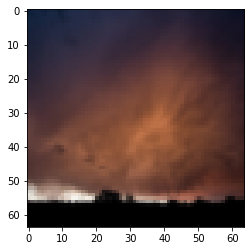

In [6]:
plt.imshow(train_set_x_orig[index])

In [13]:
# m_train : training number
# m_test : test number
# num_px : image width and height

In [14]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).shape #train_set_orig.shape[0]에대한 로우가 생기고 나머지는 다 컬럼으로 만들어진다. 
## 즉 train_set_x_orig.shape[0] = 209이므로 209개의 row가 생기고 나머지 값들은 컬럼에 자동으로 추가된다.

In [27]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

RGB는 0 부터 255를 가지는데 우리는 이것의 크기를 최소화하고 값을 표준화시킨다.

In [30]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

# Sigmoid Function
    
    Sigmoid는 logistic regression에서 활성함수로 사용된다.
    즉 (w.T*x+b)에 sigmoid를 한 결과가 logistic regression이다.

In [32]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig
    

# Initilizing parameters

    w와 b의 처음 가중치를 0으로 초기화한다.

In [34]:
def initialize_with_zeors(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape ==(dim,1))
    return w, b

# Propagatin